In [1]:
!pip install requests
!pip install nltk
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

In [2]:
import nltk
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\badbw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\badbw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 20
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews


In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,"✅ Trip Verified | Check in was so slow, no se..."
1,✅ Trip Verified | My review relates to the ap...
2,✅ Trip Verified | This was my first time flyin...
3,✅ Trip Verified | Lots of cancellations and d...
4,✅ Trip Verified | BA 242 on the 6/2/23. Boardi...


In [5]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,"✅ Trip Verified | Check in was so slow, no se..."
1,✅ Trip Verified | My review relates to the ap...
2,✅ Trip Verified | This was my first time flyin...
3,✅ Trip Verified | Lots of cancellations and d...
4,✅ Trip Verified | BA 242 on the 6/2/23. Boardi...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  2000 non-null   object
dtypes: object(1)
memory usage: 15.8+ KB


In [7]:
df['reviews'] = df["reviews"].str.replace("✅ Trip Verified","")
df['reviews']

0        |  Check in was so slow, no self check in and...
1        |  My review relates to the appalling experie...
2        | This was my first time flying with BA & I w...
3        |  Lots of cancellations and delays and no on...
4        | BA 242 on the 6/2/23. Boarding was delayed ...
                              ...                        
1995    British Airways have randomly cancelled a flig...
1996    ✅ Verified Review |  Domestic BA from London a...
1997    Las Vegas to London Heathrow return, and we di...
1998    My wife and I flew to Dublin from London Heath...
1999    ✅ Verified Review |  Very good flight back to ...
Name: reviews, Length: 2000, dtype: object

In [8]:
df['reviews'] = df["reviews"].str.replace("Not Verified","")
df['reviews']

0        |  Check in was so slow, no self check in and...
1        |  My review relates to the appalling experie...
2        | This was my first time flying with BA & I w...
3        |  Lots of cancellations and delays and no on...
4        | BA 242 on the 6/2/23. Boarding was delayed ...
                              ...                        
1995    British Airways have randomly cancelled a flig...
1996    ✅ Verified Review |  Domestic BA from London a...
1997    Las Vegas to London Heathrow return, and we di...
1998    My wife and I flew to Dublin from London Heath...
1999    ✅ Verified Review |  Very good flight back to ...
Name: reviews, Length: 2000, dtype: object

In [9]:
df['reviews'] = df["reviews"].str.replace("✅ Verified Review","")
df['reviews']

0        |  Check in was so slow, no self check in and...
1        |  My review relates to the appalling experie...
2        | This was my first time flying with BA & I w...
3        |  Lots of cancellations and delays and no on...
4        | BA 242 on the 6/2/23. Boarding was delayed ...
                              ...                        
1995    British Airways have randomly cancelled a flig...
1996     |  Domestic BA from London and Edinburgh retu...
1997    Las Vegas to London Heathrow return, and we di...
1998    My wife and I flew to Dublin from London Heath...
1999     |  Very good flight back to London from Barba...
Name: reviews, Length: 2000, dtype: object

In [10]:
df

,reviews
0,"| Check in was so slow, no self check in and..."
1,| My review relates to the appalling experie...
2,| This was my first time flying with BA & I w...
3,| Lots of cancellations and delays and no on...
4,| BA 242 on the 6/2/23. Boarding was delayed ...
...,...
1995,British Airways have randomly cancelled a flig...
1996,| Domestic BA from London and Edinburgh retu...
1997,"Las Vegas to London Heathrow return, and we di..."
1998,My wife and I flew to Dublin from London Heath...


In [11]:

df.reviews[0]

' |  Check in was so slow, no self check in and bag drop. Boarding was ok, flight totally full. Booked row 9 which was ok. Some space in overhead bins. Seat and legroom ok. Cabin crew ok, smiled, gave out the bottle of water and pretzels. Flight itself was ok, landed 25 mins early and then waited 30 minutes for a stand and ground crew. Bags came off reasonably quickly. BA still seems to believe it is something special, a premium carrier. The reality is that it is not. The only reason we flew BA was we got virtually free tickets because both flights were cancelled last year. BA is our carrier of last choice.'

In [12]:
pip install plotly

In [13]:
import pandas as pd
import numpy as np
import plotly.express as px

import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import time
import datetime

In [14]:
df.isnull().sum()

reviews    0
dtype: int64

In [15]:
# checking shape
print("The dataset has {} rows and {} columns.".format(*df.shape))

The dataset has 2000 rows and 1 columns.


In [16]:
df.shape

(2000, 1)

In [17]:
df.reviews

0        |  Check in was so slow, no self check in and...
1        |  My review relates to the appalling experie...
2        | This was my first time flying with BA & I w...
3        |  Lots of cancellations and delays and no on...
4        | BA 242 on the 6/2/23. Boarding was delayed ...
                              ...                        
1995    British Airways have randomly cancelled a flig...
1996     |  Domestic BA from London and Edinburgh retu...
1997    Las Vegas to London Heathrow return, and we di...
1998    My wife and I flew to Dublin from London Heath...
1999     |  Very good flight back to London from Barba...
Name: reviews, Length: 2000, dtype: object

In [18]:
# import necessary libraries
!pip install wordcloud
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
from PIL import Image

import re
import string

In [19]:
# wrap the plotting in a function for easier access
def plot_wordcloud(wordcloud, language):
    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.title(language + ' Reviews from BA\n', fontsize=18, fontweight='bold')
    plt.show()

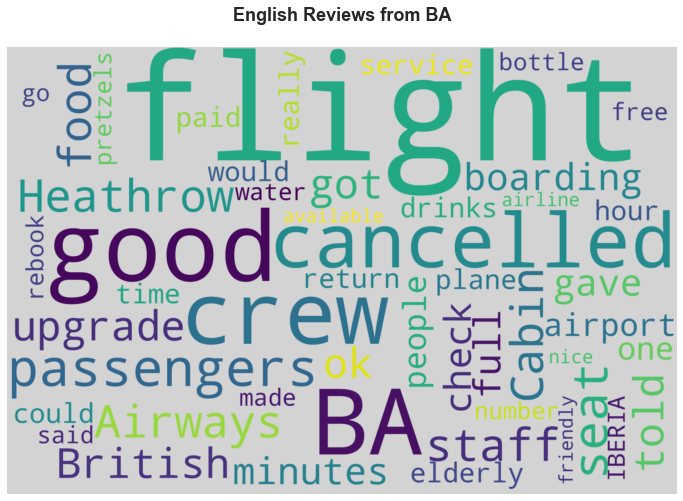

In [20]:
wordcloud = WordCloud(max_font_size=None, max_words=50,
                      background_color="lightgrey", 
                      width=3000, height=2000,collocations=False,
                      stopwords = stopwords.words('english'))

wordcloud.generate(str(df.reviews.values))

plot_wordcloud(wordcloud, 'English')

In [21]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [22]:
## We will use the polarity_scores() method to obtain the polarity indices for the given sentence.

def sentiment_analyzer_scores(sentence):
    score = analyzer.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [23]:
# getting only the negative score
def negative_score(text):
    negative_value = analyzer.polarity_scores(text)['neg']
    return negative_value

# getting only the neutral score
def neutral_score(text):
    neutral_value = analyzer.polarity_scores(text)['neu']
    return neutral_value

# getting only the positive score
def positive_score(text):
    positive_value = analyzer.polarity_scores(text)['pos']
    return positive_value

# getting only the compound score
def compound_score(text):
    compound_value = analyzer.polarity_scores(text)['compound']
    return compound_value

In [24]:
df['reviews'].iloc[:2].apply(compound_score)

0    0.6022
1   -0.6126
Name: reviews, dtype: float64

In [25]:
%%time
df['sentiment_neg'] = df['reviews'].apply(negative_score)
df['sentiment_neu'] = df['reviews'].apply(neutral_score)
df['sentiment_pos'] = df['reviews'].apply(positive_score)
df['sentiment_compound'] = df['reviews'].apply(compound_score)

Wall time: 1min 3s


In [26]:
df['reviews'].apply(compound_score)

0       0.6022
1      -0.6126
2       0.8204
3      -0.4141
4       0.9564
         ...  
1995    0.9220
1996    0.9065
1997    0.7784
1998    0.8626
1999    0.9972
Name: reviews, Length: 2000, dtype: float64

In [27]:
df.to_csv('Sentiment_BritishAirways.csv')

In [28]:
df = pd.read_csv('Sentiment_BritishAirways.csv', index_col=0)

In [29]:
df.columns

Index(['reviews', 'sentiment_neg', 'sentiment_neu', 'sentiment_pos',
       'sentiment_compound'],
      dtype='object')

In [30]:
df.head(2)

,reviews,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
0,"| Check in was so slow, no self check in and...",0.053,0.871,0.076,0.6022
1,| My review relates to the appalling experie...,0.054,0.900,0.046,-0.6126


In [31]:
df['sentiment_compound'].value_counts(normalize=True)*100

 0.0000    0.30
-0.0516    0.30
-0.7096    0.25
 0.9889    0.25
 0.5574    0.20
           ... 
 0.9804    0.05
 0.1486    0.05
-0.8675    0.05
-0.3952    0.05
 0.9972    0.05
Name: sentiment_compound, Length: 1682, dtype: float64

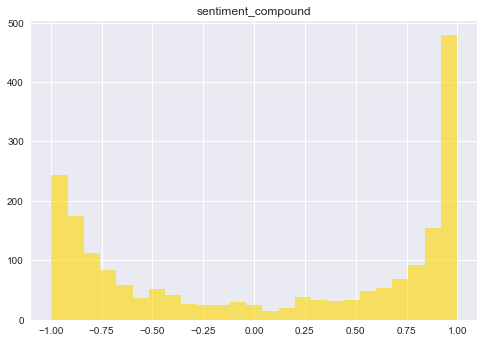

In [32]:
df.hist('sentiment_compound', bins=25, 
        color='gold', alpha=0.6);

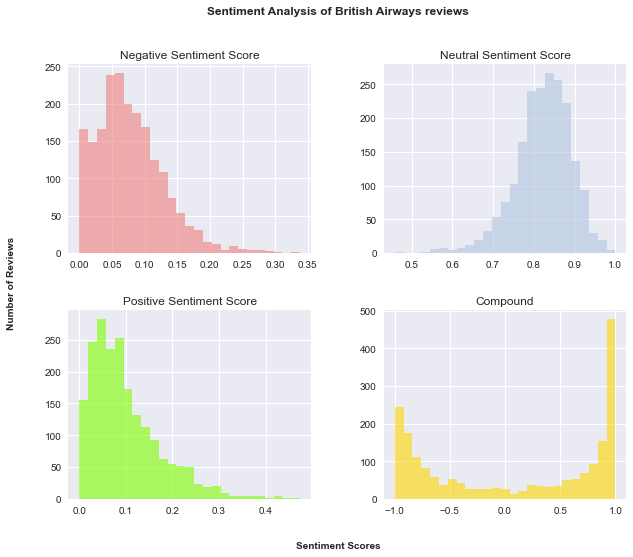

In [33]:
# all scores in 4 histograms
fig, axes = plt.subplots(2, 2, figsize=(10,8))

# plot all 4 histograms
df.hist('sentiment_neg', bins=25, ax=axes[0,0], color='lightcoral', 
        alpha=0.6)
axes[0,0].set_title('Negative Sentiment Score')

df.hist('sentiment_neu', bins=25, ax=axes[0,1], 
        color='lightsteelblue', alpha=0.6)
axes[0,1].set_title('Neutral Sentiment Score')

df.hist('sentiment_pos', bins=25, ax=axes[1,0], 
        color='chartreuse', alpha=0.6)
axes[1,0].set_title('Positive Sentiment Score')

df.hist('sentiment_compound', bins=25, ax=axes[1,1],
        color='gold', alpha=0.6)
axes[1,1].set_title('Compound')

# plot common x- and y-label
fig.text(0.5, 0.04, 'Sentiment Scores',  fontweight='bold', ha='center')
fig.text(0.04, 0.5, 'Number of Reviews', fontweight='bold', va='center', rotation='vertical')

# plot title
plt.suptitle('Sentiment Analysis of British Airways reviews\n\n', fontsize=12, fontweight='bold')
plt.savefig('Sentiment Analysis of British Airways reviews.png')

In [34]:
# full dataframe with POSITIVE comments
df_pos = df.loc[df.sentiment_compound >= 0.95]
df_pos
# only corpus of POSITIVE comments
pos_comments = df_pos['reviews'].tolist()
pos_comments

# df_neg = df.loc[df.sentiment_compound <= 0.95]
# df_neg

# neg_comments = df_neg['reviews'].tolist()
# neg_comments

[' | BA 242 on the 6/2/23. Boarding was delayed due to late arrival from the incoming flight. Communication from the ground staff was excellent and keep us informed. In flight services were excellent, the crews were friendly with excellent service! Overall, very happy with BA.',
 ' |  Not only my first flight in 17 years, but also my first time back to England for 17 years. I flew from PMI-LGW on 21/01/2023 and returned on 29/01/2023. Both Wizz Air and EasyJet offered very inconvenient flight times and charged more than the flights were worth for baggage. British Airways were the most convenient and best value option available, they offered ideal flight times and the €18 charge per flight for baggage was very reasonable - Total cost for both flights was €126 +/- Regular update information via email, seamless online seat allocation and check in. Efficient staff at the check in desks at PMI and LGW ensured that long queues were dealt with as quickly as humanly possible. Immaculate aircra

In [35]:
# full dataframe with NEGATIVE comments
df_neg = df.loc[df.sentiment_compound < 0.0]

# only corpus of NEGATIVE comments
neg_comments = df_neg['reviews'].tolist()
neg_comments

[' |  My review relates to the appalling experiences I had with British Airways on 14th February 2023. I was due to travel to Madrid with British Airways and before setting off I heard on the radio that there were flight delays. I looked at the Heathrow Airport website and saw that my flight had been cancelled. As a result of the information on the website, I called British Airways and have 26 minutes on hold I found myself speaking to somebody in a call centre in South Africa. The person was hard to understand due to a heavy accent and he was incompetent and insisted that the flight was not cancelled. I made my way to Heathrow and sure enough the flight was indeed cancelled. The woman in question had the audacity to declare that the flight was cancelled and that “there are no facilities here at the airport to rebook you”. She refused to let me and about 12 other people join the queue for the clearly marked assistance desk. The same woman and one of her colleagues gave out a card with 

In [36]:
df_pos['text_length'] = df_pos['reviews'].apply(len)
df_neg['text_length'] = df_neg['reviews'].apply(len)

In [37]:
df_neg['text_length']

1       2639
3        328
8       1777
10       536
14      1194
        ... 
1983    2624
1989    3000
1990     779
1991    1743
1993    2472
Name: text_length, Length: 914, dtype: int64

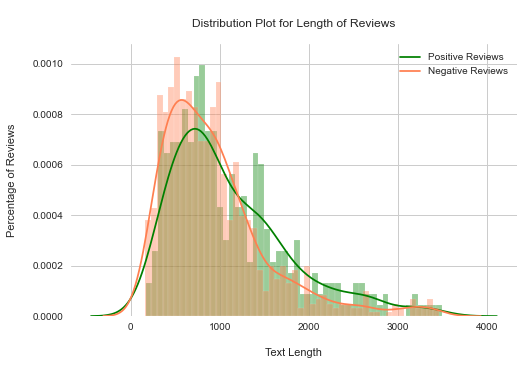

In [38]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))

sns.distplot(df_pos['text_length'], kde=True, bins=50, color='green')
sns.distplot(df_neg['text_length'], kde=True, bins=50, color='coral')

plt.title('\nDistribution Plot for Length of Reviews\n')
plt.legend(['Positive Reviews', 'Negative Reviews'])
plt.xlabel('\nText Length')
plt.ylabel('Percentage of Reviews\n');
plt.savefig('Distribution Plot for Length of Reviews.png')

In [39]:
# read some positive comments
pos_comments[10:15]

[' |  Just a few years ago flying on BA was enjoyable, but times have changed. These days about five hours on board the plane is no fun at all. The Terminal 5 experience still feels classy, and on the way out it felt well staffed and efficient. On board though, it’s just become an experience to be endured. BA’s mean decision to split seats into nicer for the first half of the plane, and nastier for the rest underlines this. There is no entertainment, no magazine. Refreshment purchases are brought to the seat after ordering from an app. There is no attempt to provide fresh or hot food on the day, despite the competition being able to do this. Is it too much to ask for, when trapped on board for five hours? You get a free tiny bottle of water and a small cereal bar. On the outbound flight the crew collected rubbish just once before landing, but helpfully tied a bag around a toilet door down the back in case anyone wanted to fight their way past and clear things up themselves. Recline but

In [40]:
# read some negative comments
neg_comments[10:15]

[" |  Paid £200 day before flight for an upgrade from economy to premium economy. At checkin they could not find my booking so a little wait while they rang someone who explains on the upgrade you get deleted from the system the checkin agent sees? Took about 5 minutes to resolve. Seat was nice enough. Stowage pocket in front a bit small. Food was reasonably nice. Shame that the bathroom is all the way back through economy and there is a bit of a queue. IFE system is good but selection mediocre. Worst part of the flight is that at CPT so we were on a remote stand and bussed in. Through passport control quickly but then it took an absolute age to get our luggage which ruined what would otherwise have been a reasonable flight. Upgrade was worth it at £200 maybe £300 (its a long flight) but their offers of £2000 or whatever for premium economy is comedy pricing. Score before the luggage fiasco would have been 7 or 8 / 10. With the luggage fiasco I can't rate it more than 4/10.",
 ' |  BA 

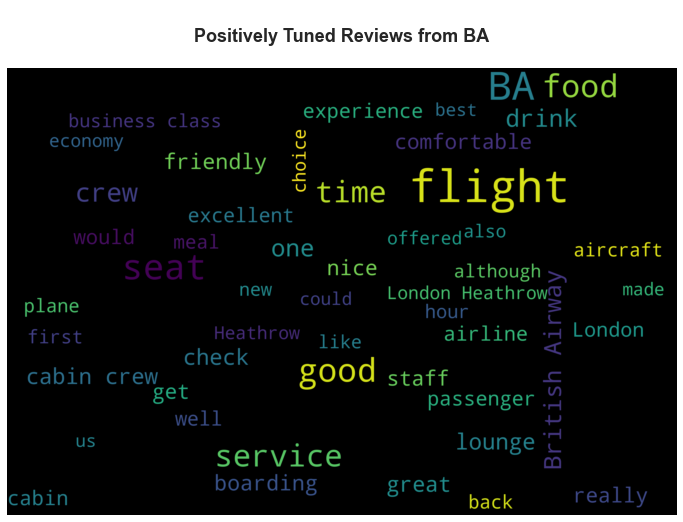

<Figure size 576x396 with 0 Axes>

In [41]:
wordcloud = WordCloud(max_font_size=200, max_words=50, background_color="black",
                      width= 3000, height = 2000,
                      stopwords = stopwords.words('english')).generate(str(df_pos.reviews.values))

plot_wordcloud(wordcloud, '\nPositively Tuned')
plt.savefig('World Cloud POS.png')

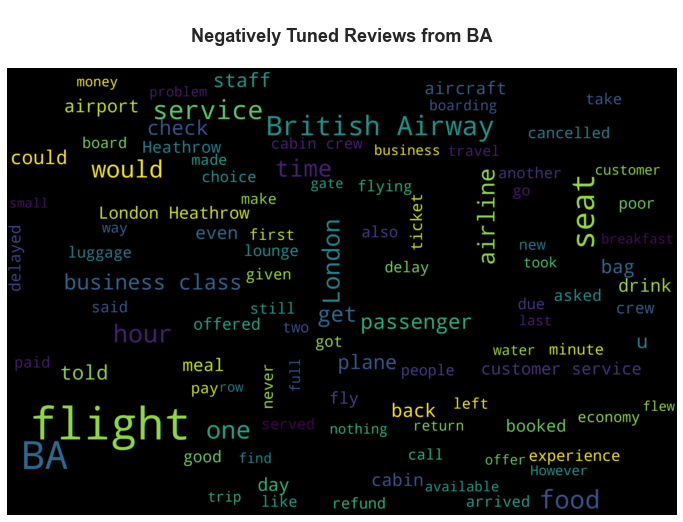

<Figure size 576x396 with 0 Axes>

In [42]:
wordcloud = WordCloud(max_font_size=200, max_words=100, background_color="black",
                      width= 3000, height = 2000,
                      stopwords = stopwords.words('english')).generate(str(df_neg.reviews.values))

plot_wordcloud(wordcloud, '\nNegatively Tuned')
plt.savefig('World Cloud NEG.png')

In [43]:
# importing libraries
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text.freqdist import FreqDistVisualizer
from yellowbrick.style import set_palette

In [44]:
# vectorizing text
vectorizer = CountVectorizer(stop_words='english')
docs = vectorizer.fit_transform(neg_comments)
docs
features = vectorizer.get_feature_names_out()

In [45]:
#features
docs

<914x7543 sparse matrix of type '<class 'numpy.int64'>'
	with 58973 stored elements in Compressed Sparse Row format>

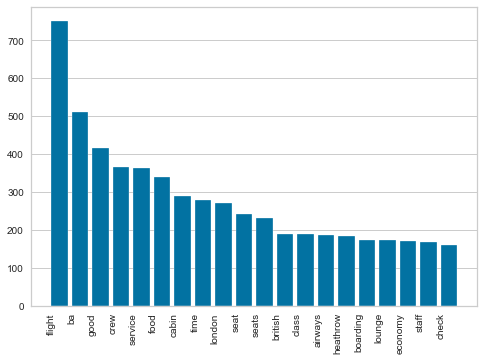

In [50]:
visualizer = FreqDistVisualizer(features=features, orient='v', n=20)
visualizer.fit(docs)
visualizer.poof
plt.savefig('Freq_word_reviews.png')

In [51]:
docs = vectorizer.fit_transform(pos_comments)
docs
features = vectorizer.get_feature_names_out()

AttributeError: 'FrequencyVisualizer' object has no attribute 'n'

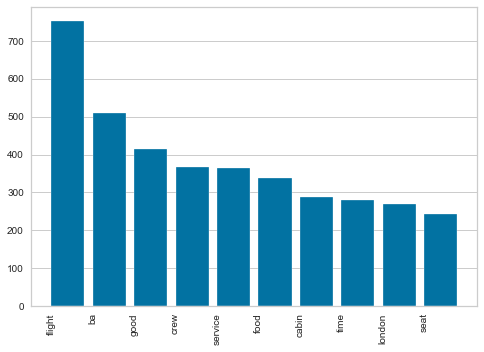

In [52]:
visualizer = FreqDistVisualizer(features=features, orient='v', n=10)
visualizer.fit(docs)
visualizer.poof